# Library Installation

In [50]:
# !pip install -q pyod==2.0.5
# !pip install numpy==1.24.4
# !pip install --no-cache-dir scikit-learn==1.0.2
# !pip install --no-cache-dir cloudpickle==3.1.1
# !pip install pandas scikit-learn tensorflow --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org
!pip install -v --no-cache-dir torch==2.4.1 --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org
# !pip install shap
# !pip install lime
# !pip uninstall -v scikit-learn


Using pip 25.2 from C:\Users\299957\Assessment\.venv\Lib\site-packages\pip (python 3.13)


ERROR: Could not find a version that satisfies the requirement torch==2.4.1 (from versions: 2.6.0, 2.7.0, 2.7.1, 2.8.0, 2.9.0)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for torch==2.4.1


In [51]:
# !pip show torch
import sys

print(sys.path)

['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.2544.0_x64__qbz5n2kfra8p0\\python313.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.2544.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.2544.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.2544.0_x64__qbz5n2kfra8p0', 'c:\\Users\\299957\\Assessment\\.venv', '', 'c:\\Users\\299957\\Assessment\\.venv\\Lib\\site-packages', 'c:\\Users\\299957\\Assessment\\.venv\\Lib\\site-packages\\win32', 'c:\\Users\\299957\\Assessment\\.venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\299957\\Assessment\\.venv\\Lib\\site-packages\\Pythonwin']


In [ ]:
%pip install lime

In [56]:
# !pip show pyod
# !pip show torch
# !pip show lime

import sys
import numpy as np
import pyod, torch, lime
import joblib
import cloudpickle

print(f"✅ Python version: {sys.version}")
print(f"✅ NumPy version: {np.__version__}")
print(f"✅ PyOD version: {pyod.__version__}")
print(f"✅ torch version: {torch.__version__}")
print(f"✅ CloudPickle version: {cloudpickle.__version__}")
try:
    import sklearn
    print(f"✅ scikit-learn version: {sklearn.__version__}")
except ImportError:
    print("❌ scikit-learn not found!")

# print(f"📁 Attempting to load: {model_file}")
# print(f"✅ Lime version: {lime.__version__}")


✅ Python version: 3.13.9 (tags/v3.13.9:8183fa5, Oct 14 2025, 14:09:13) [MSC v.1944 64 bit (AMD64)]
✅ NumPy version: 2.3.2
✅ PyOD version: 2.0.5
✅ torch version: 2.9.0+cpu
✅ CloudPickle version: 3.1.1
✅ scikit-learn version: 1.7.1


# Library Imports

In [57]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pyod.models.dif import DIF
from pyod.models.anogan import AnoGAN
from pyod.models.alad import ALAD
from pyod.models.ecod import ECOD
import shap

# Load Data

In [58]:
# Load your dataset
df = pd.read_csv("Datasets/demo_test_weekly_data_2810.csv")
df.describe()

,provider_id,provider_office_zip_cd,provider_office_zip_cd_3_digit,medicare_provider_id_provider,national_provider_id_provider,payer_cd,provider_specialty_cd,provider_state_license_number,provider_tax_id,provider_composite_id,medicaid_facility_number,medicare_provider_id_provider_composite,national_provider_id_provider_composite,provider_composite_address_id,latitude,longitude,zip_cd,zip_cd_3_digit,hsr
count,9997.000000,9997.000000,9997.000000,9.997000e+03,9.997000e+03,9997.000000,9997.000000,9997.000000,9.997000e+03,9997.000000,9997.000000,9.997000e+03,9.997000e+03,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,49674.807342,49993.886366,506.520556,5.518378e+08,1.501915e+09,503.473742,132.275683,549078.118736,5.548071e+08,54693.228769,55138.315495,5.454168e+08,5.497419e+08,54319.685806,0.034799,-2.174253,50226.618886,504.914274,49.534360
std,28904.122348,28600.138429,288.352718,2.625826e+08,2.910322e+08,288.925859,70.969749,258127.839579,2.585507e+08,25823.707494,25994.849922,2.589584e+08,2.598342e+08,26017.771630,51.956205,104.928811,28940.139568,287.992645,28.544966
min,1.000000,515.000000,5.000000,1.000498e+08,1.003178e+09,1.000000,1.000000,100142.000000,1.001144e+08,10000.000000,10024.000000,1.001651e+08,1.001584e+08,10001.000000,-89.992807,-179.978637,513.000000,5.000000,1.000000
25%,24170.000000,25473.000000,258.000000,3.233935e+08,1.245069e+09,255.000000,59.000000,327331.000000,3.331420e+08,32545.000000,32859.000000,3.174928e+08,3.219061e+08,31599.000000,-45.104767,-93.770167,24610.000000,255.000000,24.000000
50%,49900.000000,49424.000000,509.000000,5.546725e+08,1.508252e+09,508.000000,150.000000,553339.000000,5.587646e+08,54362.000000,54868.000000,5.454202e+08,5.508147e+08,53752.000000,-0.623642,-3.388225,50343.000000,511.000000,49.000000
75%,74680.000000,74932.000000,761.000000,7.837369e+08,1.750852e+09,753.000000,193.000000,770905.000000,7.793245e+08,76721.000000,77882.000000,7.685801e+08,7.752914e+08,77004.000000,45.604126,89.595410,75194.000000,757.000000,74.000000
max,99998.000000,99917.000000,999.000000,9.999480e+08,1.992987e+09,999.000000,244.000000,999650.000000,9.999071e+08,99996.000000,99990.000000,9.999638e+08,9.994621e+08,99984.000000,89.980365,179.955570,99949.000000,999.000000,99.000000


# Helper functions

In [59]:

def check_indexes(target_indexes, indexes_to_find):
    idx_list = []
    for idx in indexes_to_find:
        if idx in target_indexes:
            print(f"-- Index {idx} found.")
            idx_list.append(idx)
    return idx_list
        # else:
            # print(f"Index {idx} not found.")


In [60]:

import matplotlib.pyplot as plt

# from .data import check_consistent_shape
# from .data import get_outliers_inliers
from sklearn.utils import check_X_y
from sklearn.utils import check_consistent_length
from sklearn.utils import column_or_1d

def check_consistent_shape(X_train, y_train, X_test, y_test, y_train_pred,
                           y_test_pred):
    """Internal shape to check input data shapes are consistent.

    Parameters
    ----------
    X_train : numpy array of shape (n_samples, n_features)
        The training samples.

    y_train : list or array of shape (n_samples,)
        The ground truth of training samples.

    X_test : numpy array of shape (n_samples, n_features)
        The test samples.

    y_test : list or array of shape (n_samples,)
        The ground truth of test samples.

    y_train_pred : numpy array of shape (n_samples, n_features)
        The predicted binary labels of the training samples.

    y_test_pred : numpy array of shape (n_samples, n_features)
        The predicted binary labels of the test samples.

    Returns
    -------
    X_train : numpy array of shape (n_samples, n_features)
        The training samples.

    y_train : list or array of shape (n_samples,)
        The ground truth of training samples.

    X_test : numpy array of shape (n_samples, n_features)
        The test samples.

    y_test : list or array of shape (n_samples,)
        The ground truth of test samples.

    y_train_pred : numpy array of shape (n_samples, n_features)
        The predicted binary labels of the training samples.

    y_test_pred : numpy array of shape (n_samples, n_features)
        The predicted binary labels of the test samples.
    """

    # check input data shapes are consistent
    X_train, y_train = check_X_y(X_train, y_train)
    X_test, y_test = check_X_y(X_test, y_test)

    y_test_pred = column_or_1d(y_test_pred)
    y_train_pred = column_or_1d(y_train_pred)

    check_consistent_length(y_train, y_train_pred)
    check_consistent_length(y_test, y_test_pred)

    if X_train.shape[1] != X_test.shape[1]:
        raise ValueError("X_train {0} and X_test {1} have different number "
                         "of features.".format(X_train.shape, X_test.shape))

    return X_train, y_train, X_test, y_test, y_train_pred, y_test_pred


def get_outliers_inliers(X, y):
    """Internal method to separate inliers from outliers.

    Parameters
    ----------
    X : numpy array of shape (n_samples, n_features)
        The input samples

    y : list or array of shape (n_samples,)
        The ground truth of input samples.

    Returns
    -------
    X_outliers : numpy array of shape (n_samples, n_features)
        Outliers.

    X_inliers : numpy array of shape (n_samples, n_features)
        Inliers.

    """
    X_outliers = X[np.where(y == 1)]
    X_inliers = X[np.where(y == 0)]
    return X_outliers, X_inliers


def visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True,
              save_figure=False):  # pragma: no cover
    """Utility function for visualizing the results in examples.
    Internal use only.

    Parameters
    ----------
    clf_name : str
        The name of the detector.

    X_train : numpy array of shape (n_samples, n_features)
        The training samples.

    y_train : list or array of shape (n_samples,)
        The ground truth of training samples.

    X_test : numpy array of shape (n_samples, n_features)
        The test samples.

    y_test : list or array of shape (n_samples,)
        The ground truth of test samples.

    y_train_pred : numpy array of shape (n_samples, n_features)
        The predicted binary labels of the training samples.

    y_test_pred : numpy array of shape (n_samples, n_features)
        The predicted binary labels of the test samples.

    show_figure : bool, optional (default=True)
        If set to True, show the figure.

    save_figure : bool, optional (default=False)
        If set to True, save the figure to the local.

    """

    def _add_sub_plot(X_inliers, X_outliers, sub_plot_title,
                      inlier_color='blue', outlier_color='orange'):
        """Internal method to add subplot of inliers and outliers.

        Parameters
        ----------
        X_inliers : numpy array of shape (n_samples, n_features)
            Outliers.

        X_outliers : numpy array of shape (n_samples, n_features)
            Inliers.

        sub_plot_title : str
            Subplot title.

        inlier_color : str, optional (default='blue')
            The color of inliers.

        outlier_color : str, optional (default='orange')
            The color of outliers.

        """
        plt.axis("equal")
        plt.scatter(X_inliers[:, 0], X_inliers[:, 1], label='inliers',
                    color=inlier_color, s=40)
        plt.scatter(X_outliers[:, 0], X_outliers[:, 1],
                    label='outliers', color=outlier_color, s=50, marker='^')
        plt.title(sub_plot_title, fontsize=15)
        plt.xticks([])
        plt.yticks([])
        plt.legend(loc=3, prop={'size': 10})

    # check input data shapes are consistent
    X_train, y_train, X_test, y_test, y_train_pred, y_test_pred = \
        check_consistent_shape(X_train, y_train, X_test, y_test, y_train_pred,
                               y_test_pred)

    if X_train.shape[1] != 2:
        raise ValueError("Input data has to be 2-d for visualization. The "
                         "input data has {shape}.".format(shape=X_train.shape))

    X_train_outliers, X_train_inliers = get_outliers_inliers(X_train, y_train)
    X_train_outliers_pred, X_train_inliers_pred = get_outliers_inliers(
        X_train, y_train_pred)

    X_test_outliers, X_test_inliers = get_outliers_inliers(X_test, y_test)
    X_test_outliers_pred, X_test_inliers_pred = get_outliers_inliers(
        X_test, y_test_pred)

    # plot ground truth vs. predicted results
    fig = plt.figure(figsize=(12, 10))
    plt.suptitle("Demo of {clf_name} Detector".format(clf_name=clf_name),
                 fontsize=15)

    fig.add_subplot(221)
    _add_sub_plot(X_train_inliers, X_train_outliers, 'Train Set Ground Truth',
                  inlier_color='blue', outlier_color='orange')

    fig.add_subplot(222)
    _add_sub_plot(X_train_inliers_pred, X_train_outliers_pred,
                  'Train Set Prediction', inlier_color='blue',
                  outlier_color='orange')

    fig.add_subplot(223)
    _add_sub_plot(X_test_inliers, X_test_outliers, 'Test Set Ground Truth',
                  inlier_color='green', outlier_color='red')

    fig.add_subplot(224)
    _add_sub_plot(X_test_inliers_pred, X_test_outliers_pred,
                  'Test Set Prediction', inlier_color='green',
                  outlier_color='red')

    if save_figure:
        plt.savefig('{clf_name}.png'.format(clf_name=clf_name), dpi=300)

    if show_figure:
        plt.show()


def data_visualize(X_train, y_train, show_figure=True,
                   save_figure=False):  # pragma: no cover
    """Utility function for visualizing the synthetic samples generated by
    generate_data_cluster function.

    Parameters
    ----------
    X_train : numpy array of shape (n_samples, n_features)
        The training samples.

    y_train : list or array of shape (n_samples,)
        The ground truth of training samples.

    show_figure : bool, optional (default=True)
        If set to True, show the figure.

    save_figure : bool, optional (default=False)
        If set to True, save the figure to the local.

    """

    def _plot(X_inliers, X_outliers, inlier_color='blue',
              outlier_color='orange'):
        """Internal method to add subplot of inliers and outliers.

        Parameters
        ----------
        X_inliers : numpy array of shape (n_samples, n_features)
            Outliers.

        X_outliers : numpy array of shape (n_samples, n_features)
            Inliers.

        sub_plot_title : str
            Subplot title.

        inlier_color : str, optional (default='blue')
            The color of inliers.

        outlier_color : str, optional (default='orange')
            The color of outliers.

        """
        plt.axis("equal")
        plt.scatter(X_inliers[:, 0], X_inliers[:, 1], label='inliers',
                    color=inlier_color, s=40)
        plt.scatter(X_outliers[:, 0], X_outliers[:, 1],
                    label='outliers', color=outlier_color, s=50, marker='^')
        plt.xticks([])
        plt.yticks([])
        plt.legend(loc='best', prop={'size': 10})

    assert len(X_train) <= 5
    in_colors = ['blue', 'green', 'purple', 'brown', 'black']
    out_colors = ['red', 'orange', 'grey', 'violet', 'pink']
    plt.figure(figsize=(13, 10))
    plt.suptitle("Demo of Generating Data in Clusters", fontsize=15)
    for i, cluster in enumerate(X_train):
        X_train_outliers, X_train_inliers = get_outliers_inliers(cluster,
                                                                 y_train[i])
        _plot(X_train_inliers, X_train_outliers,
              inlier_color=in_colors[i],
              outlier_color=out_colors[i])

    if save_figure:
        plt.savefig()

    if show_figure:
        plt.show()

# Train Test Split

In [61]:
# Keep only numeric columns and drop missing values
df_numeric = df.select_dtypes(include='number').dropna()
print(df_numeric.shape)

# Split into training and test sets
X_train, X_test = train_test_split(df_numeric, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(9997, 19)
(6997, 19) (3000, 19)


# Anomaly Approaches

## ECOD Model

In [62]:
# --- ECOD Model ---
ecod = ECOD()
ecod.fit(X_train)
ecod_train_scores = ecod.decision_scores_
ecod_test_scores = ecod.decision_function(X_test)

# Print summaries
print("ECOD Training Scores Summary:")
print(pd.Series(ecod_train_scores).describe())

print("\nECOD Test Scores Summary:")
print(pd.Series(ecod_test_scores).describe())

# Train - Average anomaly score is 31
# Test  - Average anomaly score is 32

ECOD Training Scores Summary:
count    6997.000000
mean       31.983697
std         4.271511
min        20.652469
25%        28.998163
50%        31.690481
75%        34.646949
max        53.173208
dtype: float64

ECOD Test Scores Summary:
count    3000.000000
mean       32.031890
std         4.351952
min        20.616582
25%        28.971986
50%        31.701774
75%        34.723066
max        48.812795
dtype: float64


In [63]:
#  Define percentiles to evaluate
percentiles = [25, 50, 75, 90, 95, 99]

# Create a DataFrame with test data and scores
test_df = pd.DataFrame(X_test)  # assuming X_test is a DataFrame or can be converted
test_df['ECOD_Score'] = ecod_test_scores
test_df = test_df[['provider_id','national_provider_id_provider_composite', 'ECOD_Score']]

# Generate anomaly DataFrames for each percentile
anomaly_dfs = {}
for p in percentiles:
    threshold = np.percentile(ecod_test_scores, p)
    df_name = f'ecod_anomaly_df_{p}'
    anomaly_df = test_df[test_df['ECOD_Score'] > threshold].copy()
    anomaly_df['is_ecod_anomaly'] = 'y'
    anomaly_dfs[df_name] = anomaly_df

In [64]:
print(anomaly_dfs.keys())

target_indexes = anomaly_dfs['ecod_anomaly_df_50'].reset_index()['index'].tolist()

# Checking the ML Pattern 3.1 and Pattern 3.2 from Run - demo_run_0822_sunith_mathew_20250822_161724
indexes_to_find = [486,9106,9715] + [297,468,477,540,642,743,779,897,930,944,986,1533,1547,1583,1936,1994,2136,2367,2396,2483,2487,2652,2748,3015,3035,3180,3224,3302,3356,3511,3542,3548,3613,3678,3749,3765,3803,3823,3886,3907,4030,4134,4143,4146,4181,4265,4384,4437,4594,4728,4997,5127,5258,5301,5330,5342,5406,5504,5898,5959,6334,6370,6478,6538,6579,6706,6919,6989,7157,7221,7256,7280,7285,7296,7354,7373,7446,7477,7532,7868,7898,7942,7958,8221,8253,8265,8289,8320,8420,8512,8615,8816,8849,8850,8971,8979,9090,9267,9282,9287,9302,9356,9380,9556,9596,9672,9936]
print("Checking matching anomalous rows from ML Pattern 3.1 and 3.2")
print(f"Total rows in ML Pattern 3.1 and 3.2: {len(indexes_to_find)}")
matching_indexes = check_indexes(target_indexes, indexes_to_find)
print(f"Total overlapping anomalies: {len(matching_indexes)}")



dict_keys(['ecod_anomaly_df_25', 'ecod_anomaly_df_50', 'ecod_anomaly_df_75', 'ecod_anomaly_df_90', 'ecod_anomaly_df_95', 'ecod_anomaly_df_99'])
Checking matching anomalous rows from ML Pattern 3.1 and 3.2
Total rows in ML Pattern 3.1 and 3.2: 110
-- Index 540 found.
-- Index 743 found.
-- Index 779 found.
-- Index 1533 found.
-- Index 2487 found.
-- Index 2748 found.
-- Index 3542 found.
-- Index 4181 found.
-- Index 4265 found.
-- Index 5504 found.
-- Index 6478 found.
-- Index 7256 found.
-- Index 7477 found.
-- Index 7532 found.
-- Index 8849 found.
-- Index 8850 found.
Total overlapping anomalies: 16


In [65]:
# # visualize the results
# visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
#               y_test_pred, show_figure=True, save_figure=False)

X_train

,provider_id,provider_office_zip_cd,provider_office_zip_cd_3_digit,medicare_provider_id_provider,national_provider_id_provider,payer_cd,provider_specialty_cd,provider_state_license_number,provider_tax_id,provider_composite_id,medicaid_facility_number,medicare_provider_id_provider_composite,national_provider_id_provider_composite,provider_composite_address_id,latitude,longitude,zip_cd,zip_cd_3_digit,hsr
9073,83902.0,68738.0,237.0,156786021.0,1.801460e+09,836.0,222.0,512278.0,991855480.0,45007.0,50071.0,706722343.0,933395401.0,44623.0,-74.279280,146.117836,93154.0,705.0,29.0
2603,9570.0,51772.0,700.0,714036307.0,1.497251e+09,940.0,34.0,504190.0,913921864.0,39180.0,63205.0,921010810.0,187150970.0,44601.0,-11.314917,53.144270,93613.0,826.0,53.0
8837,62646.0,15043.0,490.0,531161752.0,1.629646e+09,402.0,223.0,256041.0,990601794.0,98908.0,66560.0,798230460.0,900201415.0,86261.0,-80.246026,12.497694,94911.0,103.0,28.0
1579,44558.0,78320.0,142.0,333710137.0,1.497586e+09,494.0,155.0,560133.0,456922393.0,62321.0,94498.0,775949210.0,359949886.0,94836.0,-24.296854,3.172475,36481.0,537.0,81.0
9900,65797.0,88535.0,500.0,490234325.0,1.962232e+09,441.0,146.0,521036.0,435146540.0,42955.0,33067.0,666543695.0,288771228.0,68559.0,-31.139142,160.700558,39781.0,835.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,20031.0,84754.0,923.0,480045851.0,1.619707e+09,571.0,200.0,735535.0,116875365.0,70715.0,33121.0,770569272.0,690145240.0,71196.0,-78.864076,-107.914464,6161.0,669.0,23.0
5191,17891.0,93152.0,153.0,492466404.0,1.992113e+09,930.0,163.0,103986.0,744725768.0,78939.0,69202.0,750641077.0,295398906.0,21385.0,87.869751,162.207254,71817.0,751.0,41.0
5390,33272.0,84349.0,995.0,177500495.0,1.447782e+09,22.0,125.0,661068.0,562403165.0,57884.0,79261.0,771797062.0,809409134.0,71921.0,81.538076,-125.075802,92306.0,264.0,91.0
860,26393.0,14537.0,504.0,249229844.0,1.902644e+09,35.0,29.0,228273.0,346889140.0,16258.0,42833.0,584869983.0,566477160.0,21944.0,29.147897,30.643615,92682.0,328.0,78.0


## DIF Model

### Anomaly Generation

In [66]:

# --- DIF Model ---
# In DIF, each tree is replaced with a small neural network (autoencoder-like) model.
# The neural nets project data into different latent subspaces (randomly but nonlinearly). 
# Then isolation happens in those learned spaces, not just along raw features.

dif = DIF()
dif.fit(X_train)

dif_train_scores = dif.decision_scores_
dif_test_scores = dif.decision_function(X_test)

# Print summaries
print("DIF Train Scores Summary:")
print(pd.Series(dif_train_scores).describe())

print("DIF Test Scores Summary:")
print(pd.Series(dif_test_scores).describe())


DIF Train Scores Summary:
count    6997.000000
mean        0.347215
std         0.049975
min         0.216716
25%         0.308453
50%         0.346119
75%         0.389456
max         0.444984
dtype: float64
DIF Test Scores Summary:
count    3000.000000
mean        0.330255
std         0.009605
min         0.299099
25%         0.323752
50%         0.330219
75%         0.336706
max         0.365801
dtype: float64


In [67]:
# pd.DataFrame(X_test)

In [68]:

# Create a DataFrame with test data and scores
test_df = pd.DataFrame(X_test)  # assuming X_test is a DataFrame or can be converted
test_df['dif_Score'] = dif_test_scores

test_df = test_df[['provider_id','national_provider_id_provider_composite', 'dif_Score']]
print(test_df.shape)
test_df.head()


(3000, 3)


,provider_id,national_provider_id_provider_composite,dif_Score
4122,37266.0,201579562.0,0.328993
4065,54237.0,789631614.0,0.314252
1731,80232.0,929256456.0,0.332956
4740,85103.0,584947124.0,0.330788
6391,15189.0,271523465.0,0.327639


### Anomaly Percentile 

In [69]:
#  Define percentiles to evaluate
percentiles = [25, 50, 75, 90, 95, 99]

# Generate anomaly DataFrames for each percentile
dif_anomaly_dfs = {}
for p in percentiles:
    threshold = np.percentile(dif_test_scores, p)
    df_name = f'dif_anomaly_df_{p}'
    anomaly_df = test_df[test_df['dif_Score'] > threshold].copy()
    anomaly_df['is_dif_anomaly'] = 'y'
    dif_anomaly_dfs[df_name] = anomaly_df

print(dif_anomaly_dfs.keys())



dict_keys(['dif_anomaly_df_25', 'dif_anomaly_df_50', 'dif_anomaly_df_75', 'dif_anomaly_df_90', 'dif_anomaly_df_95', 'dif_anomaly_df_99'])


In [70]:
print(dif_anomaly_dfs['dif_anomaly_df_25']['dif_Score'].min(), dif_anomaly_dfs['dif_anomaly_df_25']['dif_Score'].max())

dif_anomaly_dfs['dif_anomaly_df_25']

# Location-related features : The high-anomaly samples are geographically shifted — they tend to come from areas with lower latitude and longitude values compared to low-anomaly samples.
# provider_specialty_cd :  

0.3237560782025212 0.36580087925185895


,provider_id,national_provider_id_provider_composite,dif_Score,is_dif_anomaly
4122,37266.0,201579562.0,0.328993,y
1731,80232.0,929256456.0,0.332956,y
4740,85103.0,584947124.0,0.330788,y
6391,15189.0,271523465.0,0.327639,y
4376,91446.0,153554717.0,0.332730,y
...,...,...,...,...
5580,26835.0,899469033.0,0.331707,y
1074,78317.0,714130341.0,0.339516,y
3063,28933.0,184509019.0,0.337099,y
4554,86343.0,832612626.0,0.339461,y


In [71]:
# Loop through each percentile and print the min and max DIF score range
for p in [25, 50, 75, 90, 95, 99]:
    df_name = f'dif_anomaly_df_{p}'
    if df_name in dif_anomaly_dfs:
        min_score = dif_anomaly_dfs[df_name]['dif_Score'].min()
        max_score = dif_anomaly_dfs[df_name]['dif_Score'].max()
        print(f"Percentile {p}: Min = {min_score:.4f}, Max = {max_score:.4f}")
        display(dif_anomaly_dfs[df_name].head())  # show top 5 rows for reference
        print(dif_anomaly_dfs[df_name].shape)
    else:
        print(f"{df_name} not found.")


Percentile 25: Min = 0.3238, Max = 0.3658


,provider_id,national_provider_id_provider_composite,dif_Score,is_dif_anomaly
4122,37266.0,201579562.0,0.328993,y
1731,80232.0,929256456.0,0.332956,y
4740,85103.0,584947124.0,0.330788,y
6391,15189.0,271523465.0,0.327639,y
4376,91446.0,153554717.0,0.332730,y


(2250, 4)
Percentile 50: Min = 0.3302, Max = 0.3658


,provider_id,national_provider_id_provider_composite,dif_Score,is_dif_anomaly
1731,80232.0,929256456.0,0.332956,y
4740,85103.0,584947124.0,0.330788,y
4376,91446.0,153554717.0,0.332730,y
576,2412.0,474540707.0,0.335998,y
6837,72272.0,962331158.0,0.345900,y


(1500, 4)
Percentile 75: Min = 0.3367, Max = 0.3658


,provider_id,national_provider_id_provider_composite,dif_Score,is_dif_anomaly
6837,72272.0,962331158.0,0.345900,y
1963,83248.0,911497698.0,0.344198,y
9090,44175.0,132551933.0,0.339224,y
321,42607.0,502503686.0,0.337130,y
8856,23922.0,984377768.0,0.359681,y


(750, 4)
Percentile 90: Min = 0.3426, Max = 0.3658


,provider_id,national_provider_id_provider_composite,dif_Score,is_dif_anomaly
6837,72272.0,962331158.0,0.345900,y
1963,83248.0,911497698.0,0.344198,y
8856,23922.0,984377768.0,0.359681,y
4649,93504.0,111390968.0,0.343337,y
5364,36987.0,889463450.0,0.346453,y


(300, 4)
Percentile 95: Min = 0.3460, Max = 0.3658


,provider_id,national_provider_id_provider_composite,dif_Score,is_dif_anomaly
8856,23922.0,984377768.0,0.359681,y
5364,36987.0,889463450.0,0.346453,y
4215,38306.0,753221187.0,0.352864,y
9460,19292.0,366079872.0,0.350211,y
2498,19656.0,798892658.0,0.347088,y


(150, 4)
Percentile 99: Min = 0.3520, Max = 0.3658


,provider_id,national_provider_id_provider_composite,dif_Score,is_dif_anomaly
8856,23922.0,984377768.0,0.359681,y
4215,38306.0,753221187.0,0.352864,y
6252,82158.0,372537220.0,0.352446,y
4216,15276.0,673407247.0,0.364679,y
7107,4034.0,349161791.0,0.352701,y


(30, 4)


In [72]:
summary = []

for p in percentiles:
    df_name = f'dif_anomaly_df_{p}'
    anomaly_df = dif_anomaly_dfs[df_name]
    count = len(anomaly_df)
    min_score = anomaly_df['dif_Score'].min()
    max_score = anomaly_df['dif_Score'].max()
    threshold = np.percentile(test_df['dif_Score'], p)
    
    summary.append({
        "Percentile": p,
        "Threshold": round(threshold, 4),
        "Anomalies Found": count,
        "Min DIF Score": round(min_score, 4),
        "Max DIF Score": round(max_score, 4),
        "Percent of Data Flagged": round((count / len(test_df)) * 100, 2)
    })

import pandas as pd
summary_df = pd.DataFrame(summary)
summary_df


,Percentile,Threshold,Anomalies Found,Min DIF Score,Max DIF Score,Percent of Data Flagged
0,25,0.3238,2250,0.3238,0.3658,75.0
1,50,0.3302,1500,0.3302,0.3658,50.0
2,75,0.3367,750,0.3367,0.3658,25.0
3,90,0.3426,300,0.3426,0.3658,10.0
4,95,0.3460,150,0.3460,0.3658,5.0
5,99,0.3519,30,0.3520,0.3658,1.0


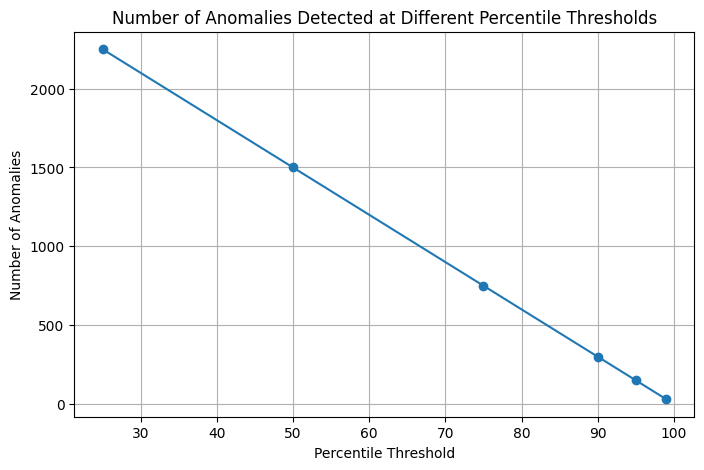

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(summary_df["Percentile"], summary_df["Anomalies Found"], marker='o')
plt.title("Number of Anomalies Detected at Different Percentile Thresholds")
plt.xlabel("Percentile Threshold")
plt.ylabel("Number of Anomalies")
plt.grid(True)
plt.show()


In [ ]:
# Taking too long to finish
 
# dif_explainer = shap.Explainer(dif.decision_function, X_test)
# dif_test_shap_values = dif_explainer(X_test)

# shap.summary_plot(dif_test_shap_values, X_test)

In [75]:
X_test.head(1)

,provider_id,provider_office_zip_cd,provider_office_zip_cd_3_digit,medicare_provider_id_provider,national_provider_id_provider,payer_cd,provider_specialty_cd,provider_state_license_number,provider_tax_id,provider_composite_id,medicaid_facility_number,medicare_provider_id_provider_composite,national_provider_id_provider_composite,provider_composite_address_id,latitude,longitude,zip_cd,zip_cd_3_digit,hsr
4122,37266.0,82096.0,91.0,306905451.0,1.699505e+09,708.0,149.0,128733.0,347318085.0,58968.0,63853.0,693644905.0,201579562.0,68317.0,15.266039,-77.374434,92846.0,419.0,15.0


In [76]:
test_df

,provider_id,national_provider_id_provider_composite,dif_Score
4122,37266.0,201579562.0,0.328993
4065,54237.0,789631614.0,0.314252
1731,80232.0,929256456.0,0.332956
4740,85103.0,584947124.0,0.330788
6391,15189.0,271523465.0,0.327639
...,...,...,...
5580,26835.0,899469033.0,0.331707
1074,78317.0,714130341.0,0.339516
3063,28933.0,184509019.0,0.337099
4554,86343.0,832612626.0,0.339461


In [77]:

# feature distributions for high-score vs low-score samples

test_df_2 = pd.DataFrame(X_test)
test_df_2['score'] = dif.decision_function(test_df_2.values)

# High anomalies: Top 5% by anomaly score
high_anom = test_df_2[test_df_2['score'] > test_df_2['score'].quantile(0.95)]
# Low anomalies: Bottom 5% by anomaly score
low_anom = test_df_2[test_df_2['score'] < test_df_2['score'].quantile(0.05)]

diff = high_anom.mean() - low_anom.mean()
# feature-level directionality — variables with the biggest mean shift contribute most to anomalies.
print(diff.sort_values(ascending=False))

# diff.abs().sort_values(ascending=False).plot(kind='barh', figsize=(8,4))

# Positive diff → feature values are higher in anomalies vs normal cases.
# Negative diff → feature values are lower in anomalies vs normal cases.

# the anomalous records tend to have lower values (or different IDs) for those provider-related fields compared to normal records.
# The anomalies are clustered around a different set of providers / facilities / payers / zips than the normal ones.


score                                      3.898326e-02
hsr                                       -1.161333e+01
latitude                                  -1.502500e+01
longitude                                 -5.217389e+01
provider_specialty_cd                     -5.806000e+01
provider_office_zip_cd_3_digit            -8.412000e+01
payer_cd                                  -1.498067e+02
zip_cd_3_digit                            -2.055267e+02
provider_id                               -1.148308e+04
zip_cd                                    -1.291590e+04
provider_office_zip_cd                    -1.358761e+04
medicaid_facility_number                  -1.393718e+04
provider_composite_address_id             -1.428997e+04
provider_composite_id                     -1.475622e+04
provider_state_license_number             -1.350598e+05
medicare_provider_id_provider             -4.987977e+07
national_provider_id_provider_composite   -1.536178e+08
medicare_provider_id_provider_composite   -1.612

In [78]:
high_anom['payer_cd'].value_counts(normalize=True)

payer_cd
40.0     0.020000
42.0     0.020000
473.0    0.020000
864.0    0.020000
226.0    0.013333
           ...   
263.0    0.006667
107.0    0.006667
154.0    0.006667
906.0    0.006667
819.0    0.006667
Name: proportion, Length: 127, dtype: float64

In [79]:
# how often each category (e.g., payer_cd or zip_cd_3_digit) appears in anomalies vs. normal:
anomaly_share = (
    high_anom['payer_cd'].value_counts(normalize=True) - low_anom['payer_cd'].value_counts(normalize=True)
).sort_values(ascending=False)
anomaly_share

# payer_cd - 914 is anomalous


payer_cd
552.0    0.006667
267.0    0.000000
21.0     0.000000
365.0    0.000000
532.0    0.000000
           ...   
973.0         NaN
975.0         NaN
977.0         NaN
991.0         NaN
994.0         NaN
Name: proportion, Length: 242, dtype: float64

<Axes: >

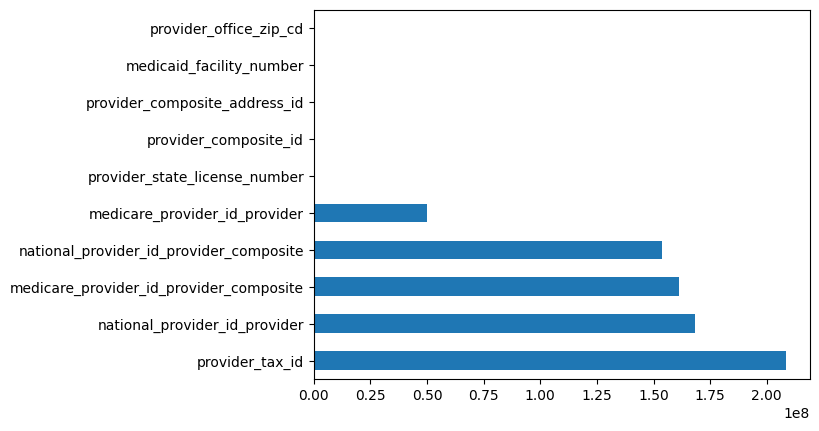

In [80]:
# Features that differ most between anomalous and normal samples.
num_cols = X_train.select_dtypes(include='number').columns
diff[num_cols].sort_values()
diff.abs().sort_values(ascending=False).head(10).plot(kind='barh')

# Likely indicates which entities the anomalies are concentrated in, not numerical direction


In [81]:
diff.abs().sort_values(ascending=False).head(10)

provider_tax_id                            2.085258e+08
national_provider_id_provider              1.684997e+08
medicare_provider_id_provider_composite    1.612358e+08
national_provider_id_provider_composite    1.536178e+08
medicare_provider_id_provider              4.987977e+07
provider_state_license_number              1.350598e+05
provider_composite_id                      1.475622e+04
provider_composite_address_id              1.428997e+04
medicaid_facility_number                   1.393718e+04
provider_office_zip_cd                     1.358761e+04
dtype: float64

### Feature Level Contribution Per Sample

In [82]:
def feature_contributions(model, X, epsilon=1e-4):
    """
    Approximate feature-level contributions per sample using finite differences.
    """
    X = X.copy()
    base_scores = model.decision_function(X)
    contributions = np.zeros_like(X, dtype=float)
    
    for j in range(X.shape[1]):
        X_perturbed = X.copy()
        X_perturbed[:, j] += epsilon
        
        perturbed_scores = model.decision_function(X_perturbed)
        contributions[:, j] = (perturbed_scores - base_scores) / epsilon  # numerical gradient
    
    return contributions

X_np = X_test.values
contrib_matrix = feature_contributions(dif, X_np)

# Mean absolute contribution per feature (global importance)
global_importance = np.mean(np.abs(contrib_matrix), axis=0)

importance_df = pd.DataFrame({
    "feature": X_test.columns,
    "importance": global_importance
}).sort_values("importance", ascending=False)

print(importance_df.head(10))


                           feature  importance
6            provider_specialty_cd    0.003701
15                       longitude    0.003444
17                  zip_cd_3_digit    0.003418
2   provider_office_zip_cd_3_digit    0.003418
5                         payer_cd    0.003418
13   provider_composite_address_id    0.003382
18                             hsr    0.000561
14                        latitude    0.000107
9            provider_composite_id    0.000002
10        medicaid_facility_number    0.000002


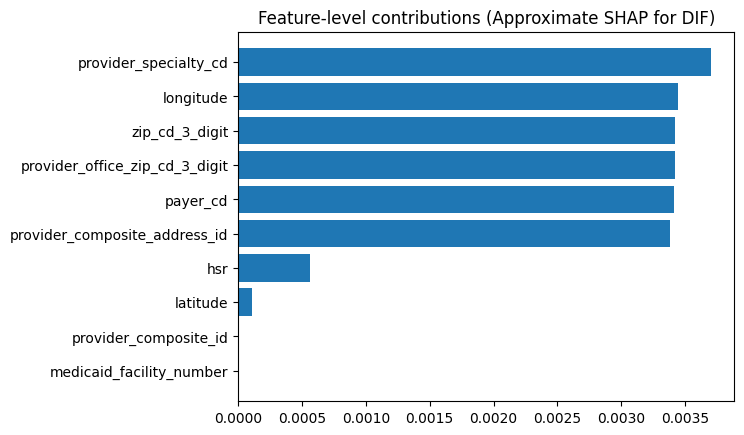

In [83]:
import matplotlib.pyplot as plt

top_features = importance_df.head(10)
plt.barh(top_features["feature"], top_features["importance"])
plt.gca().invert_yaxis()
plt.title("Feature-level contributions (Approximate SHAP for DIF)")
plt.show()


In [84]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    mode='regression'
)

i = 1000
exp = explainer.explain_instance(
    data_row=X_test.iloc[i].values,
    predict_fn=dif.decision_function
)

exp.show_in_notebook(show_table=True)


ImportError: cannot import name 'display' from 'IPython.core.display' (c:\Users\299957\Assessment\.venv\Lib\site-packages\IPython\core\display.py)

### Provider Anomaly Comparison

In [85]:

from sklearn.preprocessing import OneHotEncoder

cols_set = ['provider_id','provider_first_nm_provider', 'provider_last_nm_provider','national_provider_id_provider_composite', 'urf_designation', 'provider_urf_designation']
subset_cols = ['urf_designation', 'provider_urf_designation']

provider_urf_data = df[subset_cols]

# Split into training and test sets
X_train_urf, X_test_urf = train_test_split(provider_urf_data, test_size=0.3, random_state=42)
print(X_train_urf.shape, X_test_urf.shape)



(7007, 2) (3003, 2)


In [ ]:
X_test_urf.head(2)

,urf_designation,provider_urf_designation
6252,Frontier,Frontier
4684,Rural,Rural


In [86]:

# Perform One-Hot Encoding

# Perform One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore')  # dense output
X_trn_urf_encoded = encoder.fit_transform(X_train_urf)
X_tst_urf_encoded = encoder.transform(X_test_urf)
print(f"Encoder feature names: {encoder.feature_names_in_}")
trn_encoded_df = pd.DataFrame(X_trn_urf_encoded) # columns=encoder.get_feature_names_out(subset_cols)


Encoder feature names: ['urf_designation' 'provider_urf_designation']


In [87]:
trn_encoded_df

,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...
...,...
7002,<Compressed Sparse Row sparse matrix of dtype ...
7003,<Compressed Sparse Row sparse matrix of dtype ...
7004,<Compressed Sparse Row sparse matrix of dtype ...
7005,<Compressed Sparse Row sparse matrix of dtype ...


In [89]:

dif_urf = DIF()
dif_urf.fit(X_trn_urf_encoded.toarray()) #trn_encoded_df

dif_train_scores_urf = dif_urf.decision_scores_
dif_test_scores_urf = dif_urf.decision_function(X_tst_urf_encoded.toarray())

# Print summaries
print("DIF Train Scores Summary:")
print(pd.Series(dif_train_scores_urf).describe())

print("DIF Test Scores Summary:")
print(pd.Series(dif_test_scores_urf).describe())

DIF Train Scores Summary:
count    7007.000000
mean        0.305781
std         0.024903
min         0.271020
25%         0.271020
50%         0.321379
75%         0.324825
max         0.407086
dtype: float64
DIF Test Scores Summary:
count    3003.000000
mean        0.311133
std         0.024870
min         0.277505
25%         0.277505
50%         0.327196
75%         0.331077
max         0.405996
dtype: float64


Threshold Comparison


#### Persist Model/OHE

In [ ]:
!pip show torch

Name: torch
Version: 2.4.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: c:\users\281379\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: 


In [91]:
import os
# import joblib
import cloudpickle

model_path="assets/dif_model_cloud.pkl"
encoder_path="assets/encoder_cloud.pkl"

# Create directory if missing
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# 6️⃣ Save both model and encoder
with open(model_path, "wb") as f:
    cloudpickle.dump(dif_urf, f)
with open(encoder_path, "wb") as f:
    cloudpickle.dump(encoder, f)
# cloudpickle.dump(dif_urf, model_path)
# cloudpickle.dump(encoder, encoder_path)

print(f"✅ Model saved at: {model_path}")
print(f"✅ Encoder saved at: {encoder_path}")

✅ Model saved at: assets/dif_model_cloud.pkl
✅ Encoder saved at: assets/encoder_cloud.pkl


#### Test Data

In [92]:
test_df_urf = pd.DataFrame(X_test_urf)  # assuming X_test is a DataFrame or can be converted
test_df_urf['dif_Score'] = dif_test_scores_urf

# ['provider_id','national_provider_id_provider_composite']
cols_subset_urf = ['urf_designation', 'provider_urf_designation']
test_df_urf = test_df_urf[cols_subset_urf + ['dif_Score']]
print(test_df_urf.shape)
# test_df_urf.head()

# Join test_df_urf with the original df using index alignment
merged_df_urf = df.loc[test_df_urf.index].join(test_df_urf[['dif_Score']])
merged_df_urf.head()


(3003, 3)


,provider_id,provider_office_city_nm,provider_office_state_cd,provider_office_street_address,provider_office_zip_cd,provider_office_zip_cd_3_digit,provider_urf_designation,provider_hsr,medicare_provider_id_provider,national_provider_id_provider,...,latitude,longitude,state,zip_cd,zip_cd_3_digit,urf_designation,hsr,tax_id_type,anomalies_present,dif_Score
7438,20505.0,Port Cindy,AZ,815 Sean Common,86472.0,16.0,Rural,HSR08,723180149.0,1.346573e+09,...,62.904119,-87.153599,DE,56718.0,940.0,Rural,71.0,EIN,False,0.327196
9058,80785.0,Seanberg,SC,401 Lauren Crossroad,17199.0,742.0,Urban,HSR31,159788907.0,1.063243e+09,...,42.798063,121.117117,GA,66993.0,984.0,Urban,49.0,SSN,False,0.331077
568,71009.0,Morrisland,PA,60521 Mary Alley Suite 716,20153.0,890.0,Frontier,HSR69,413730758.0,1.710717e+09,...,67.082277,51.621217,PR,72035.0,646.0,Frontier,42.0,SSN,False,0.277505
9344,61467.0,Scottchester,CO,7424 Schroeder Landing Suite 938,11056.0,984.0,Urban,HSR51,184109780.0,1.326532e+09,...,17.977290,20.192879,AK,55264.0,812.0,Urban,11.0,SSN,False,0.331077
2236,64383.0,Lake Marcofort,WI,451 Reed Lock Suite 220,66128.0,441.0,Rural,HSR51,133914997.0,1.750733e+09,...,36.152990,80.829286,FM,33581.0,908.0,Rural,9.0,SSN,False,0.327196


In [93]:
merged_df_urf.dif_Score.unique()

array([0.32719558, 0.33107663, 0.27750476, 0.40599587, 0.3271956 ,
       0.33107664])

In [94]:
#  Define percentiles to evaluate
percentiles = [25, 50, 75, 90, 95, 99]

# Generate anomaly DataFrames for each percentile
dif_anomaly_dfs_urf = {}
for p in percentiles:
    threshold = np.percentile(dif_test_scores_urf, p)
    df_name = f'dif_anomaly_df_{p}'
    anomaly_df = test_df_urf[test_df_urf['dif_Score'] > threshold].copy()
    # Join test_df_urf with the original df using index alignment
    anomaly_df = df.loc[anomaly_df.index].join(anomaly_df[['dif_Score']])
    # anomaly_df['is_dif_anomaly'] = 'y'
    dif_anomaly_dfs_urf[df_name] = anomaly_df

print(dif_anomaly_dfs_urf.keys())


dict_keys(['dif_anomaly_df_25', 'dif_anomaly_df_50', 'dif_anomaly_df_75', 'dif_anomaly_df_90', 'dif_anomaly_df_95', 'dif_anomaly_df_99'])


In [95]:

target_indexes = dif_anomaly_dfs_urf['dif_anomaly_df_25'].reset_index()['index'].tolist()
# Checking the ML Pattern 3.1 and Pattern 3.2 from Run - demo_run_0822_sunith_mathew_20250822_161724
indexes_to_find = [486,9106,9715] 
# + [297,468,477,540,642,743,779,897,930,944,986,1533,1547,1583,1936,1994,2136,2367,2396,2483,2487,2652,2748,3015,3035,3180,3224,3302,3356,3511,3542,3548,3613,3678,3749,3765,3803,3823,3886,3907,4030,4134,4143,4146,4181,4265,4384,4437,4594,4728,4997,5127,5258,5301,5330,5342,5406,5504,5898,5959,6334,6370,6478,6538,6579,6706,6919,6989,7157,7221,7256,7280,7285,7296,7354,7373,7446,7477,7532,7868,7898,7942,7958,8221,8253,8265,8289,8320,8420,8512,8615,8816,8849,8850,8971,8979,9090,9267,9282,9287,9302,9356,9380,9556,9596,9672,9936]
print("Checking matching anomalous rows from ML Pattern 3.1 and 3.2")
print(f"Total rows in ML Pattern 3.1 and 3.2: {len(indexes_to_find)}")
matching_indexes = check_indexes(target_indexes, indexes_to_find)
print(f"Total overlapping anomalies: {len(matching_indexes)}")

Checking matching anomalous rows from ML Pattern 3.1 and 3.2
Total rows in ML Pattern 3.1 and 3.2: 3
-- Index 9715 found.
Total overlapping anomalies: 1


In [96]:
def summarize_overlapping_indexes(dif_anomaly_dfs_urf, indexes_to_find):
    summary_data = []
    for percentile_split, df in dif_anomaly_dfs_urf.items():
        target_indexes = df.reset_index()['index'].tolist()
        matching_indexes = list(set(target_indexes).intersection(indexes_to_find))
        summary_data.append({
            'percentile_split': percentile_split,
            'overlapping_anomaly_count': len(matching_indexes)
        })
    return pd.DataFrame(summary_data)

summarize_overlapping_indexes(dif_anomaly_dfs_urf, indexes_to_find)

,percentile_split,overlapping_anomaly_count
0,dif_anomaly_df_25,1
1,dif_anomaly_df_50,1
2,dif_anomaly_df_75,0
3,dif_anomaly_df_90,0
4,dif_anomaly_df_95,0
5,dif_anomaly_df_99,0


In [97]:
dif_anomaly_dfs_urf['dif_anomaly_df_25'].head(1)

,provider_id,provider_office_city_nm,provider_office_state_cd,provider_office_street_address,provider_office_zip_cd,provider_office_zip_cd_3_digit,provider_urf_designation,provider_hsr,medicare_provider_id_provider,national_provider_id_provider,...,latitude,longitude,state,zip_cd,zip_cd_3_digit,urf_designation,hsr,tax_id_type,anomalies_present,dif_Score
7438,20505.0,Port Cindy,AZ,815 Sean Common,86472.0,16.0,Rural,HSR08,723180149.0,1.346573e+09,...,62.904119,-87.153599,DE,56718.0,940.0,Rural,71.0,EIN,False,0.327196


#### Explanation(LIME)

#### Inference

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from pyod.models.dif import DIF
import cloudpickle
from typing import Tuple
import pandas as pd
import numpy as np
from pathlib import Path
from typing import List, Dict, Any



In [ ]:
# !pip show numpy
# !pip show scikit-learn
# !pip show torch

In [ ]:

# ---------------------------------------------
# Helper: message_for_rule
# ---------------------------------------------
def message_for_rule(rule_name: str) -> str:
    """Return descriptive text for a given rule."""
    messages = {
        'rule_3_3': "Model-detected anomaly using IsolationForest algorithm (pattern 3.3)."
    }
    return messages.get(rule_name, "Anomaly detected by ML model.")



In [ ]:

# ---------------------------------------------
# Orchestrator: Load + Infer + Format Results
# ---------------------------------------------
def ml_dif_anomaly_lib(
    df: pd.DataFrame,
    threshold_percentile: float = 50
) -> List[Dict[str, Any]]:
    """
    Load pretrained DIF model and encoder from the 'data/' directory
    (located one level above the current library folder), perform inference
    on df, and return anomalies in structured JSON format.
    """
    import types

    # 1 Resolve model and encoder paths
    try:
        base_dir = Path(__file__).resolve().parent.parent / "assets"
        # base_dir = Path("/app/data")
        # base_dir = Path(os.getcwd()) / "data"  # fallback for Jupyter or REPL
    except NameError:
        base_dir = Path(os.getcwd()) / "assets"  # fallback for Jupyter or REPL

    # # Resolve model and encoder paths
    # try:
    #     base_dir = Path(__file__).resolve().parent.parent / "data"
    # except NameError:
    #     base_dir = Path(os.getcwd()) / "data"  # fallback for Jupyter or REPL
    # model_file = base_dir / "dif_model.joblib"
    # encoder_file = base_dir / "encoder.joblib"

    print(f"base_dir set to: {base_dir}")

    model_files = ["dif_model_cloud.pkl"]
    encoder_files = ["encoder_cloud.pkl"]

    # Find the first existing model file
    model_file = next((base_dir / f for f in model_files if (base_dir / f).exists()), None)
    # Find the first existing encoder file
    encoder_file = next((base_dir / f for f in encoder_files if (base_dir / f).exists()), None)

    # Check if both files were found
    if model_file is None or encoder_file is None:
        raise FileNotFoundError(
            f"❌ Model or encoder not found in {base_dir}. "
            f"Tried: {model_files} and {encoder_files}"
        )
    
    # Patch missing module reference
    torch.utils = getattr(torch, "utils", types.SimpleNamespace())
    torch.utils.serialization = getattr(torch.utils, "serialization", types.SimpleNamespace())

    print(f" Loading model and encoder from: {base_dir}")
    with open(model_file, "rb") as f:
        model = cloudpickle.load(f)
    print(f"Loaded {model_file} file successfully")
    with open(encoder_file, "rb") as f:
        encoder = cloudpickle.load(f)
    print(f"Loaded {encoder_file} file successfully")

    # 2 Detect categorical columns automatically
    # subset_cols = df.select_dtypes(include="object").columns.tolist()
    subset_cols = ['urf_designation', 'provider_urf_designation']
    if not subset_cols:
        raise ValueError("❌ No categorical columns found for encoding in test data.")

    print(f"📊 Using columns for encoding: {subset_cols}")

    # 3 Perform inference
    X_test_encoded = encoder.transform(df[subset_cols])
    dif_scores = model.decision_function(X_test_encoded.toarray())

    # 4 Apply threshold
    threshold = np.percentile(dif_scores, threshold_percentile)
    df = df.copy()
    df["dif_Score"] = dif_scores
    df["is_anomaly"] = (df["dif_Score"] > threshold).astype(int)

    print(f"✅ Inference complete. Threshold = {threshold_percentile}th percentile ({threshold:.4f})")
    print(df["is_anomaly"].value_counts())

    # 5 Filter anomalies
    anomalies = df[df["is_anomaly"] == 1].reset_index(drop=True)
    if anomalies.empty:
        print("⚠️ No anomalies detected by the model.")
        return []

    # 6 Columns to include in result (keep only existing ones)
    cols_to_include = [
        "provider_id",
        "provider_first_nm_provider",
        "provider_last_nm_provider",
        "national_provider_id_provider",
        "urf_designation",
        "provider_urf_designation",
        "dif_Score",
    ]
    existing_cols = [c for c in cols_to_include if c in anomalies.columns]

    # 7 Build structured result
    result = [
        {
            "issueCol": ["urf_designation", "provider_urf_designation"],
            "issueCode": ["pattern 3.3"],
            "issueDesc": [message_for_rule("rule_3_3")],
            "issueValues": [
                {col: anomalies[col].fillna("").tolist() for col in existing_cols}
            ],
            "rowNumbers": [anomalies.index.tolist()],
        }
    ]

    print(f" Generated structured output for {len(anomalies)} anomalies.")
    return result
  


In [101]:
pattern_3_3_result = ml_dif_anomaly_lib(df=X_test_urf, threshold_percentile=75)


base_dir set to: c:\Users\299957\Assessment\assets
 Loading model and encoder from: c:\Users\299957\Assessment\assets
Loaded c:\Users\299957\Assessment\assets\dif_model_cloud.pkl file successfully
Loaded c:\Users\299957\Assessment\assets\encoder_cloud.pkl file successfully
📊 Using columns for encoding: ['urf_designation', 'provider_urf_designation']
✅ Inference complete. Threshold = 75th percentile (0.3311)
is_anomaly
0    2998
1       5
Name: count, dtype: int64
 Generated structured output for 5 anomalies.


In [102]:
pattern_3_3_result[0]

{'issueCol': ['urf_designation', 'provider_urf_designation'],
 'issueCode': ['pattern 3.3'],
 'issueDesc': ['Model-detected anomaly using IsolationForest algorithm (pattern 3.3).'],
 'issueValues': [{'urf_designation': ['', '', '', '', 'Urban'],
   'provider_urf_designation': ['', '', '', '', 'Urban'],
   'dif_Score': [0.40599586776597446,
    0.40599586776597446,
    0.40599586776597446,
    0.40599586776597446,
    0.33107663881618926]}],
 'rowNumbers': [[0, 1, 2, 3, 4]]}

In [ ]:
from typing import List, Dict, Any
from pathlib import Path
import os

In [ ]:

# ---------------------------------------------
# Orchestrator: Load + Infer + Format Results
# ---------------------------------------------
def ml_dif_anomaly_lib(
    df: pd.DataFrame,
    threshold_percentile: float = 50,
) -> List[Dict[str, Any]]:
    """
    Load pretrained DIF model and encoder from the 'data/' directory
    (located one level above the current library folder), perform inference
    on df, and return anomalies in structured JSON format.
    """
    import types

    # 1 Resolve model and encoder paths
    try:
        base_dir = Path(__file__).resolve().parent.parent / "assets"
        # base_dir = Path("/app/data")
        # base_dir = Path(os.getcwd()) / "data"  # fallback for Jupyter or REPL
    except NameError:
        base_dir = Path(os.getcwd()) / "assets"  # fallback for Jupyter or REPL

    # # Resolve model and encoder paths
    # try:
    #     base_dir = Path(__file__).resolve().parent.parent / "data"
    # except NameError:
    #     base_dir = Path(os.getcwd()) / "data"  # fallback for Jupyter or REPL
    # model_file = base_dir / "dif_model.joblib"
    # encoder_file = base_dir / "encoder.joblib"

    print(f"base_dir set to: {base_dir}")

    model_files = ["dif_model_cloud.pkl"]
    encoder_files = ["encoder_cloud.pkl"]

    # Find the first existing model file
    model_file = next((base_dir / f for f in model_files if (base_dir / f).exists()), None)
    # Find the first existing encoder file
    encoder_file = next((base_dir / f for f in encoder_files if (base_dir / f).exists()), None)

    # Check if both files were found
    if model_file is None or encoder_file is None:
        raise FileNotFoundError(
            f"❌ Model or encoder not found in {base_dir}. "
            f"Tried: {model_files} and {encoder_files}"
        )
    
    # Patch missing module reference
    torch.utils = getattr(torch, "utils", types.SimpleNamespace())
    torch.utils.serialization = getattr(torch.utils, "serialization", types.SimpleNamespace())

    print(f" Loading model and encoder from: {base_dir}")
    with open(model_file, "rb") as f:
        model = cloudpickle.load(f)
    print(f"Loaded {model_file} file successfully")
    with open(encoder_file, "rb") as f:
        encoder = cloudpickle.load(f)
    print(f"Loaded {encoder_file} file successfully")

    # 2 Detect categorical columns automatically
    # subset_cols = df.select_dtypes(include="object").columns.tolist()
    subset_cols = ['urf_designation', 'provider_urf_designation']
    if not subset_cols:
        raise ValueError("❌ No categorical columns found for encoding in test data.")

    print(f"📊 Using columns for encoding: {subset_cols}")

    # 3 Perform inference
    X_test_encoded = encoder.transform(df[subset_cols])
    dif_scores = model.decision_function(X_test_encoded.toarray())

    # 4 Apply threshold
    threshold = np.percentile(dif_scores, threshold_percentile)
    df = df.copy()
    df["dif_Score"] = dif_scores
    df["is_anomaly"] = (df["dif_Score"] > threshold).astype(int)

    print(f"✅ Inference complete. Threshold = {threshold_percentile}th percentile ({threshold:.4f})")
    print(df["is_anomaly"].value_counts())

    # 5 Filter anomalies
    anomalies = df[df["is_anomaly"] == 1].reset_index(drop=True)
    if anomalies.empty:
        print("⚠️ No anomalies detected by the model.")
        return []

    # 6 Columns to include in result (keep only existing ones)
    cols_to_include = [
        "provider_id",
        "provider_first_nm_provider",
        "provider_last_nm_provider",
        "national_provider_id_provider",
        "urf_designation",
        "provider_urf_designation",
        "dif_Score",
    ]
    existing_cols = [c for c in cols_to_include if c in anomalies.columns]

    # 7 Build structured result
    result = [
        {
            "issueCol": ["urf_designation", "provider_urf_designation"],
            "issueCode": ["pattern 3.3"],
            "issueDesc": [message_for_rule("rule_3_3")],
            "issueValues": [
                {col: anomalies[col].fillna("").tolist() for col in existing_cols}
            ],
            "rowNumbers": [anomalies.index.tolist()],
        }
    ]

    print(f" Generated structured output for {len(anomalies)} anomalies.")

    metrics = {
        "threshold_percentile": threshold_percentile,
        "threshold_value": float(threshold),
        "num_anomalies": int(anomalies.shape[0]),
        "score_min": float(df["dif_Score"].min()),
        "score_max": float(df["dif_Score"].max()),
        "score_mean": float(df["dif_Score"].mean()),
        "score_std": float(df["dif_Score"].std())
    }
    return result, metrics
  


In [ ]:
percentiles = [25, 50, 75, 90, 95, 99]
all_metrics = []

for p in percentiles:
    result, metrics = ml_dif_anomaly_lib(df, threshold_percentile=p)
    all_metrics.append(metrics)


base_dir set to: c:\Users\299957\Assessment\assets


FileNotFoundError: ❌ Model or encoder not found in c:\Users\299957\Assessment\assets. Tried: ['dif_model_cloud.pkl'] and ['encoder_cloud.pkl']

In [ ]:
metrics_df = pd.DataFrame(all_metrics)
print(metrics_df)


In [ ]:
# pattern_3_3_result[0]["issueValues"][0] #['urf_designation']
# pattern_3_3_result[0]
set(pattern_3_3_result[0]["issueValues"][0]['dif_Score'])


{0.336595760419823, 0.3517599635268431}

In [ ]:
!pip show numpy

Name: numpy
Version: 2.2.6
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
         All rights reserved.
         
         Redistribution and use in source and binary forms, with or without
         modification, are permitted provided that the following conditions are
         met:
         
             * Redistributions of source code must retain the above copyright
                notice, this list of conditions and the following disclaimer.
         
             * Redistributions in binary form must reproduce the above
                copyright notice, this list of conditions and the following
                disclaimer in the documentation and/or other materials provided
                with the distribution.
         
             * Neither the name of the NumPy Developers nor the names of any
                contributors may be used to e

### Augmented Data

In [ ]:
import pandas as pd
import itertools
import numpy as np

def generate_logical_interactions(X, numeric_pairs=True, categorical_pairs=True, cat_num_pairs=True):
    """
    Create interactions
        Numeric × numeric → use products or ratios (e.g. claim_amount × num_visits)
        Categorical × categorical → use encoded cross features (e.g. payer + zip)
        Categorical × numeric → use group-normalized or mean deviation features (e.g. how much is this provider’s cost above the mean for their payer)

    """
    import pandas as pd
    import itertools
    import numpy as np
    
    num_cols = X.select_dtypes(include=[np.number]).columns
    cat_cols = X.select_dtypes(exclude=[np.number]).columns

    interactions = pd.DataFrame(index=X.index)

    # 1. Numeric × Numeric — logical interactions
    if numeric_pairs:
        for col1, col2 in itertools.combinations(num_cols, 2):
            interactions[f'{col1}_ratio_{col2}'] = np.where(X[col2] != 0, X[col1] / X[col2], 0)
            interactions[f'{col1}_diff_{col2}'] = X[col1] - X[col2]

    # 2. Categorical × Categorical — encoded cross feature
    if categorical_pairs:
        for col1, col2 in itertools.combinations(cat_cols, 2):
            interactions[f'{col1}_x_{col2}'] = X[col1].astype(str) + "_" + X[col2].astype(str)

    # 3. Categorical × Numeric — deviation from group mean
    if cat_num_pairs:
        for cat_col in cat_cols:
            for num_col in num_cols:
                group_mean = X.groupby(cat_col)[num_col].transform('mean')
                interactions[f'{num_col}_above_{cat_col}_mean'] = X[num_col] - group_mean

    return pd.concat([X, interactions], axis=1)


In [ ]:
X_train_aug = generate_logical_interactions(X_train)

print("Original features:", X_train.shape[1])
print("Augmented features:", X_train_aug.shape[1])
X_train_aug.head(1)


In [ ]:
X_train_aug

## AnoGan

In [ ]:
# --- AnoGAN Model ---
anogan = AnoGAN()
anogan.fit(X_trn_urf_encoded)
anogan_train_scores = anogan.decision_scores_
anogan_test_scores = anogan.decision_function(X_tst_urf_encoded)

# Print summaries
print("AnoGan Train Scores Summary:")
print(pd.Series(anogan_train_scores).describe())

print("\AnoGan Test Scores Summary:")
print(pd.Series(anogan_test_scores).describe())


KeyboardInterrupt: 

## So-GaaL (Single-Objective GAN) Model
- GAN-style anomaly detector that doesn’t require purely normal data.
- The generator tries to produce potential anomalies to challenge the discriminator.
- Fully unsupervised and robust.

In [ ]:
from pyod.models.so_gaal import SO_GAAL

sogan = SO_GAAL(stop_epochs=15)
sogan.fit(X_trn_urf_encoded)
sogan_train_scores = sogan.decision_scores_
sogan_test_scores = sogan.decision_function(X_tst_urf_encoded)

# Print summaries
print("SoGan Train Scores Summary:")
print(pd.Series(sogan_train_scores).describe())

print("\SoGan Test Scores Summary:")
print(pd.Series(sogan_test_scores).describe())


Epoch 1 of 45
Epoch 2 of 45
Epoch 3 of 45
Epoch 4 of 45
Epoch 5 of 45
Epoch 6 of 45
Epoch 7 of 45
Epoch 8 of 45
Epoch 9 of 45
Epoch 10 of 45
Epoch 11 of 45
Epoch 12 of 45
Epoch 13 of 45
Epoch 14 of 45
Epoch 15 of 45
Epoch 16 of 45
Epoch 17 of 45
Epoch 18 of 45
Epoch 19 of 45
Epoch 20 of 45
Epoch 21 of 45
Epoch 22 of 45
Epoch 23 of 45
Epoch 24 of 45
Epoch 25 of 45
Epoch 26 of 45
Epoch 27 of 45
Epoch 28 of 45
Epoch 29 of 45
Epoch 30 of 45
Epoch 31 of 45
Epoch 32 of 45
Epoch 33 of 45
Epoch 34 of 45
Epoch 35 of 45
Epoch 36 of 45
Epoch 37 of 45
Epoch 38 of 45
Epoch 39 of 45
Epoch 40 of 45
Epoch 41 of 45
Epoch 42 of 45
Epoch 43 of 45
Epoch 44 of 45
Epoch 45 of 45
SoGan Train Scores Summary:
count    7000.000000
mean        0.983138
std         0.024127
min         0.019734
25%         0.955823
50%         0.996364
75%         0.998240
max         0.998240
dtype: float64
\SoGan Test Scores Summary:
count    3000.000000
mean        0.983252
std         0.026048
min         0.037983
25%        

In [ ]:
print("SoGan Train Scores Summary:")
print(pd.Series(sogan_train_scores).describe())

print("\SoGan Test Scores Summary:")
print(pd.Series(sogan_test_scores).describe())


SoGan Train Scores Summary:
count    7000.000000
mean        0.983138
std         0.024127
min         0.019734
25%         0.955823
50%         0.996364
75%         0.998240
max         0.998240
dtype: float64
\SoGan Test Scores Summary:
count    3000.000000
mean        0.983252
std         0.026048
min         0.037983
25%         0.955823
50%         0.996364
75%         0.998240
max         0.998240
dtype: float64


In [ ]:
test_df_urf_sogan = pd.DataFrame(X_test_urf)  # assuming X_test is a DataFrame or can be converted
# X_trn_urf_encoded
test_df_urf_sogan['sogan_Score'] = sogan_test_scores

# ['provider_id','national_provider_id_provider_composite']
cols_subset_urf = ['urf_designation', 'provider_urf_designation']
test_df_urf_sogan = test_df_urf_sogan[cols_subset_urf + ['sogan_Score']]
print(test_df_urf_sogan.shape)

# Join test_df_urf with the original df using index alignment
merged_df_urf_sogan = df.loc[test_df_urf_sogan.index].join(test_df_urf_sogan[['sogan_Score']])
merged_df_urf_sogan.head(2)


(3000, 3)


,provider_id,provider_office_city_nm,provider_office_state_cd,provider_office_street_address,provider_office_zip_cd,provider_office_zip_cd_3_digit,provider_urf_designation,provider_hsr,medicare_provider_id_provider,national_provider_id_provider,...,latitude,longitude,state,zip_cd,zip_cd_3_digit,urf_designation,hsr,tax_id_type,anomalies_present,sogan_Score
6252,82158,South Marcus,WY,1123 Mark Lights Suite 965,96796,122,Frontier,HSR69,799933223,1003646753,...,-43.991836,-127.647363,NJ,88849,79,Frontier,64,SSN,False,0.996364
4684,7473,Garciaburgh,NV,68596 Dawn Shores Apt. 163,12501,552,Rural,HSR81,667169699,1831929595,...,88.250636,150.298543,PW,88327,927,Rural,69,SSN,False,0.955823


#### So-Gaal Percentile

In [ ]:
#  Define percentiles to evaluate
percentiles = [25, 50, 75, 90, 95, 99]

# Generate anomaly DataFrames for each percentile
sogan_anomaly_dfs_urf = {}
for p in percentiles:
    threshold = np.percentile(sogan_test_scores, p)
    df_name = f'sogan_anomaly_df_{p}'
    anomaly_df = test_df_urf_sogan[test_df_urf_sogan['sogan_Score'] > threshold].copy()
    # Join test_df_urf with the original df using index alignment
    anomaly_df = df.loc[anomaly_df.index].join(anomaly_df[['sogan_Score']])
    sogan_anomaly_dfs_urf[df_name] = anomaly_df

print(sogan_anomaly_dfs_urf.keys())


dict_keys(['sogan_anomaly_df_25', 'sogan_anomaly_df_50', 'sogan_anomaly_df_75', 'sogan_anomaly_df_90', 'sogan_anomaly_df_95', 'sogan_anomaly_df_99'])


In [ ]:

target_indexes = sogan_anomaly_dfs_urf['sogan_anomaly_df_75'].reset_index()['index'].tolist()
# Checking the ML Pattern 3.1 and Pattern 3.2 from Run - demo_run_0822_sunith_mathew_20250822_161724
indexes_ml_pattern_1 = [486,9106,9715]
indexes_ml_pattern_2 = [297,468,477,540,642,743,779,897,930,944,986,1533,1547,1583,1936,1994,2136,2367,2396,2483,2487,2652,2748,3015,3035,3180,3224,3302,3356,3511,3542,3548,3613,3678,3749,3765,3803,3823,3886,3907,4030,4134,4143,4146,4181,4265,4384,4437,4594,4728,4997,5127,5258,5301,5330,5342,5406,5504,5898,5959,6334,6370,6478,6538,6579,6706,6919,6989,7157,7221,7256,7280,7285,7296,7354,7373,7446,7477,7532,7868,7898,7942,7958,8221,8253,8265,8289,8320,8420,8512,8615,8816,8849,8850,8971,8979,9090,9267,9282,9287,9302,9356,9380,9556,9596,9672,9936] 
indexes_to_find = indexes_ml_pattern_1 
print("Checking matching anomalous rows from ML Pattern 3.1 and 3.2")
print(f"Total rows in ML Pattern 3.1 and 3.2: {len(indexes_to_find)}")
matching_indexes = check_indexes(target_indexes, indexes_to_find)
print(f"Total overlapping anomalies: {len(matching_indexes)}")


Checking matching anomalous rows from ML Pattern 3.1 and 3.2
Total rows in ML Pattern 3.1 and 3.2: 3
Total overlapping anomalies: 0


In [ ]:
def summarize_overlapping_indexes(anomaly_dfs, indexes_to_find):
    summary_data = []
    for percentile_split, df in anomaly_dfs.items():
        target_indexes = df.reset_index()['index'].tolist()
        matching_indexes = list(set(target_indexes).intersection(indexes_to_find))
        summary_data.append({
            'percentile_split': percentile_split,
            'overlapping_anomaly_count': len(matching_indexes)
        })
    return pd.DataFrame(summary_data)

summarize_overlapping_indexes(sogan_anomaly_dfs_urf, indexes_to_find)

,percentile_split,overlapping_anomaly_count
0,sogan_anomaly_df_25,2
1,sogan_anomaly_df_50,2
2,sogan_anomaly_df_75,0
3,sogan_anomaly_df_90,0
4,sogan_anomaly_df_95,0
5,sogan_anomaly_df_99,0


#### Explanation

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

sogan_trn_df = pd.DataFrame(X_trn_urf_encoded, columns=encoder.get_feature_names_out())
sogna_tst_df = pd.DataFrame(X_tst_urf_encoded, columns=encoder.get_feature_names_out())
explainer = LimeTabularExplainer(
    training_data=sogan_trn_df.values,
    feature_names=sogan_trn_df.columns,
    mode='regression'
)

i = 486
exp = explainer.explain_instance(
    data_row=sogna_tst_df.iloc[i].values,
    predict_fn=sogan.decision_function
)

exp.show_in_notebook(show_table=True)


# LIME’s explanation matches the 486 instance explanation from one-class SVM
# The bars labeled “provider_urf_designation_Rural” and “urf_designation_Rural” both have positive contributions.
# Bars labeled “provider_urf_designation_Urban” and “urf_designation_Urban” have negative contributions.

# it shows “Rural” features (both in provider and URF designation) as positive anomaly drivers
# while “Urban” features act as stabilizers.

# The conflict between Rural vs Urban triggered the anomaly detection.


In [ ]:
# component creation - Xpresso - DIF - (Pattern 3.3 - Clustering)
# Check SHAP integration with DIF
